In [1]:
#importing Important Library

import re
import numpy as np
import pandas as pd
import nltk

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
#Loading Data

gpu = pd.read_csv('GPU.csv')
xy = pd.read_csv('Task-x-y.csv')
ac = pd.read_csv('Application-checkpoints.csv')

Now lets explore the data structure

In [3]:
# Shape of the data frame 

print(f"Shape of GPU : {gpu.shape}")
print(f"Shape of Task-x-y : {xy.shape}")
print(f"Shape of Application-checkpoints : {ac.shape}")

Shape of GPU : (1048575, 8)
Shape of Task-x-y : (65793, 5)
Shape of Application-checkpoints : (660400, 6)


So Now we know that three data frames have different frame and different entries of data.

In [4]:
# Summary structure of each column of each data frame

print(gpu.info())
print(xy.info())
print(ac.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   timestamp       1048575 non-null  object 
 1   hostname        1048575 non-null  object 
 2   gpuSerial       1048575 non-null  float64
 3   gpuUUID         1048575 non-null  object 
 4   powerDrawWatt   1048575 non-null  float64
 5   gpuTempC        1048575 non-null  int64  
 6   gpuUtilPerc     1048575 non-null  int64  
 7   gpuMemUtilPerc  1048575 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 64.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65793 entries, 0 to 65792
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   taskId  65793 non-null  object
 1   jobId   65793 non-null  object
 2   x       65793 non-null  int64 
 3   y       65793 non-null  int64 
 4   level   65793 non-nul

 Lets Dig for deeper understanding of data frames.

 To undestand the data better looking into few entries of the data frames

In [5]:
print("------------ GPU ----------------")
gpu.head()

------------ GPU ----------------


,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08T08:27:10.314Z,8b6a0eebc87b4cb2b0539e81075191b900001C,3.232170e+11,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
1,2018-11-08T08:27:10.192Z,d8241877cd994572b46c861e5d144c85000000,3.236170e+11,GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f,117.03,40,92,48
2,2018-11-08T08:27:10.842Z,db871cd77a544e13bc791a64a0c8ed50000006,3.232170e+11,GPU-f4597939-a0b4-e78a-2436-12dbab9a350f,121.64,45,91,44
3,2018-11-08T08:27:10.424Z,b9a1fa7ae2f74eb68f25f607980f97d7000010,3.252170e+11,GPU-ad773c69-c386-a4be-b214-1ea4fc6045df,50.23,38,90,43
4,2018-11-08T08:27:10.937Z,db871cd77a544e13bc791a64a0c8ed50000003,3.232170e+11,GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2,141.82,41,90,47


In [6]:
print("------------ task-x-y ----------------")
xy.head()

------------ task-x-y ----------------


,taskId,jobId,x,y,level
0,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12
1,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12
2,0003c380-4db9-49fb-8e1c-6f8ae466ad85,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,86,12
3,000993b6-fc88-489d-a4ca-0a44fd800bd3,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,235,11,12
4,000b158b-0ba3-4dca-bf5b-1b3bd5c28207,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,171,53,12


In [7]:
print("------------ ac ----------------")
ac.head()

------------ ac ----------------


,timestamp,hostname,eventName,eventType,jobId,taskId
0,2018-11-08T07:41:55.921Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043
1,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
2,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
3,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
4,2018-11-08T07:43:13.957Z,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d


It will be an easier analysis if all three dataframes combined into one, but before that we need to remove column with null or na entry.

In [9]:
# Dropping NULL or NA entries.

ac.dropna(inplace=True)
xy.dropna(inplace=True)
gpu.dropna(inplace=True)

In [10]:
# Merging 2 dataframes based on columns using join operation

merged_table = xy.merge( ac, on=['jobId','taskId'], how='outer')

merged_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660400 entries, 0 to 660399
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   taskId     660400 non-null  object             
 1   jobId      660400 non-null  object             
 2   x          660400 non-null  int64              
 3   y          660400 non-null  int64              
 4   level      660400 non-null  int64              
 5   timestamp  660400 non-null  datetime64[ns, UTC]
 6   hostname   660400 non-null  object             
 7   eventName  660400 non-null  object             
 8   eventType  660400 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 50.4+ MB


#Now attempting to merge the third dataframe to already existing  merged dataframes

merged_table1 = ac.merge( gpu, on=['hostname'], how='outer')

After multiple attempts kernel died, so instead of combining the dataframes, preferring to work in seperate data frame

In [11]:
# Checking for any duplicate entries in the dataset for each data frames

print(f"Duplicate entried in  GPU : {gpu.duplicated().sum()}")
print(f"Duplicate entried in  Task-x-y : {xy.duplicated().sum()}")
print(f"Duplicate entried in  Application-checkpoints : {ac.duplicated().sum()}")

Duplicate entried in  GPU : 6
Duplicate entried in  Task-x-y : 0
Duplicate entried in  Application-checkpoints : 2470


In [12]:
# Removing duplicate entries

gpu.drop_duplicates(inplace=True)
xy.drop_duplicates(inplace=True)
ac.drop_duplicates(inplace=True)

# TASK 1 : Which event types dominate task runtimes?

Lets first check how many types of events are present 

In [13]:
# Checking the number of unique events in the dataset

ac['eventName'].unique()

array(['Tiling', 'Saving Config', 'Render', 'TotalRender', 'Uploading'],
      dtype=object)

In [20]:
ac = sorted(items, key=lambda item: item['timestamp'])

NameError: name 'items' is not defined

In [8]:
# Conversion of timestamp column to datetime for easier duration calculation in future

ac['timestamp'] = pd.to_datetime(ac['timestamp'])
gpu['timestamp'] = pd.to_datetime(gpu['timestamp'])


In [14]:
# Converting timestamp to time calculate time


#convert timestmap to seconds


ac['time_seconds'] = ac['timestamp'].dt.hour*3600 + ac['timestamp'].dt.minute*60 + ac['timestamp'].dt.second


In [15]:
# Dropping other columns which wont be required

ACdrop = ac.drop(columns=['hostname','jobId','taskId','timestamp'])
print(ACdrop)

            eventName eventType  time_seconds
0              Tiling      STOP         27715
1       Saving Config     START         27749
2       Saving Config      STOP         27749
3              Render     START         27749
4         TotalRender      STOP         27793
...               ...       ...           ...
660395         Tiling      STOP         30610
660396      Uploading      STOP         30610
660397         Tiling      STOP         30614
660398    TotalRender      STOP         30614
660399      Uploading      STOP         30612

[657930 rows x 3 columns]


In [16]:
# create a new column for duration
ACdrop['duration'] = 0


def calculate_duration(group):
    start_times = {}
    for i, row in group.iterrows():
        if row['eventType'] == 'START':
            start_times[row['eventName']] = row['time_seconds']
        elif row['eventType'] == 'STOP':
            if row['eventName'] in start_times:
                group.at[i, 'duration'] = (pd.to_datetime(row['time_seconds']) - pd.to_datetime(start_times[row['eventName']])).total_seconds()
    return group

ACdrop = ACdrop.groupby(['eventName']).apply(calculate_duration)

print(ACdrop)


            eventName eventType  time_seconds  duration
0              Tiling      STOP         27715       0.0
1       Saving Config     START         27749       0.0
2       Saving Config      STOP         27749       0.0
3              Render     START         27749       0.0
4         TotalRender      STOP         27793       0.0
...               ...       ...           ...       ...
660395         Tiling      STOP         30610       0.0
660396      Uploading      STOP         30610       0.0
660397         Tiling      STOP         30614       0.0
660398    TotalRender      STOP         30614       0.0
660399      Uploading      STOP         30612       0.0

[657930 rows x 4 columns]


So there are 5 even types. Lets which takes maximum run times among these 5 events. each event has a entry when is START and when it STOP.

In [17]:
# Grouping based on event name and their event type


ACdrop = ACdrop.groupby(by=['eventName','eventType']).sum()
print(ACdrop)

                         time_seconds  duration
eventName     eventType                        
Render        START        1915934995  0.000000
              STOP         1918646223 -0.015537
Saving Config START        1915934825  0.000000
              STOP         1915934989 -0.007191
Tiling        START        1918646691  0.000000
              STOP         1918710709 -0.012830
TotalRender   START        1915934819  0.000000
              STOP         1918737852 -0.015596
Uploading     START        1918646230  0.000000
              STOP         1918737844 -0.012978


In [18]:
# Calculate Duration between START and STOP of each event

ACdrop['time_diff'] = ACdrop.groupby('eventName')['time_seconds'].diff()
ACdrop['time_diff'] = ACdrop['time_diff'].fillna(0)
ACdrop['time_diff'] = ACdrop['time_diff'].astype(int)

# Dropping eventType column that arent required

ACdrop = ac.drop(columns=['eventType'])


print(ACdrop)

                              timestamp  \
0      2018-11-08 07:41:55.921000+00:00   
1      2018-11-08 07:42:29.842000+00:00   
2      2018-11-08 07:42:29.845000+00:00   
3      2018-11-08 07:42:29.845000+00:00   
4      2018-11-08 07:43:13.957000+00:00   
...                                 ...   
660395 2018-11-08 08:30:10.296000+00:00   
660396 2018-11-08 08:30:10.325000+00:00   
660397 2018-11-08 08:30:14.081000+00:00   
660398 2018-11-08 08:30:14.127000+00:00   
660399 2018-11-08 08:30:12.159000+00:00   

                                      hostname      eventName  \
0       0d56a730076643d585f77e00d2d8521a00000N         Tiling   
1       0d56a730076643d585f77e00d2d8521a00000N  Saving Config   
2       0d56a730076643d585f77e00d2d8521a00000N  Saving Config   
3       0d56a730076643d585f77e00d2d8521a00000N         Render   
4       0d56a730076643d585f77e00d2d8521a00000N    TotalRender   
...                                        ...            ...   
660395  0745914f4de046078517

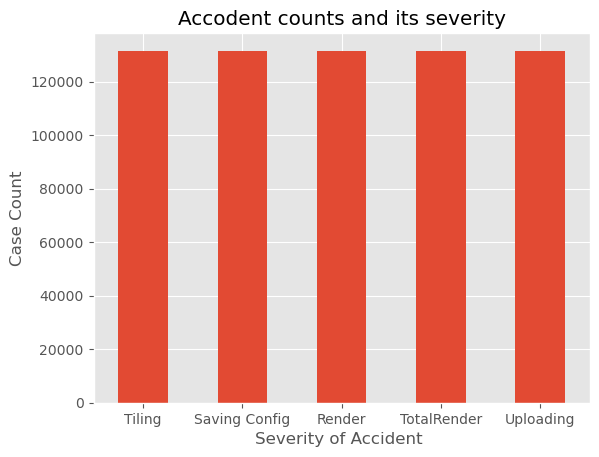

In [19]:
ac.eventName.value_counts().plot(kind="bar")
plt.title("Accodent counts and its severity")
plt.xlabel("Severity of Accident ")
plt.xticks(rotation=0)
plt.ylabel("Case Count")
plt.show()
